In [1]:
# This cell loads the HR Employee Attrition dataset and performs initial EDA (structure, head, basic stats)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configure display
pd.set_option('display.max_columns', 100)

# Load data
file_path = r"C:\Users\FrankJR\Downloads\Portfolio\HR Dataset\HR-Employee-Attrition.csv"
df_hr = pd.read_csv(file_path, encoding='UTF-8-SIG')

In [2]:
# Basic shape and dtypes
print('Rows: ' + str(df_hr.shape[0]))
print('Columns: ' + str(df_hr.shape[1]))
print('Columns preview:')
print(df_hr.columns.tolist())

Rows: 1470
Columns: 35
Columns preview:
['EmployeeNumber', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [10]:
# Show head
print('Head:')
print(df_hr.head(10))

Head:
   EmployeeNumber  Age Attrition     BusinessTravel  DailyRate  \
0               1   41       Yes      Travel_Rarely       1102   
1               2   49        No  Travel_Frequently        279   
2               4   37       Yes      Travel_Rarely       1373   
3               5   33        No  Travel_Frequently       1392   
4               7   27        No      Travel_Rarely        591   
5               8   32        No  Travel_Frequently       1005   
6              10   59        No      Travel_Rarely       1324   
7              11   30        No      Travel_Rarely       1358   
8              12   38        No  Travel_Frequently        216   
9              13   36        No      Travel_Rarely       1299   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2     

In [4]:
# Missing values
missing_counts = df_hr.isna().sum().sort_values(ascending=False)
print('Missing values per column (top 10):')
print(missing_counts.head(10))

# Target balance
print('Attrition value counts:')
print(df_hr['Attrition'].value_counts())

# Basic numeric description
print('Numeric summary:')
print(df_hr.describe(include=[np.number]).T.head(15))

# Convert some categorical columns to category dtype for later efficiency
cat_cols_guess = df_hr.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols_guess:
    df_hr[c] = df_hr[c].astype('category')
print('Converted object columns to category dtype.')

# Quick visualization: target distribution
plt.figure(figsize=(4,3))
sns.countplot(x='Attrition', data=df_hr)
plt.title('Attrition Distribution')
plt.tight_layout()
plt.show()

# Save a small profile summary of categorical cardinalities
cat_card = df_hr[cat_cols_guess].nunique().sort_values(ascending=False)
print('Categorical cardinalities (top 10):')
print(cat_card.head(10))

Missing values per column (top 10):
EmployeeNumber      0
Age                 0
Attrition           0
BusinessTravel      0
DailyRate           0
Department          0
DistanceFromHome    0
Education           0
EducationField      0
EmployeeCount       0
dtype: int64


In [5]:
# Target balance
print('Attrition value counts:')
print(df_hr['Attrition'].value_counts())

Attrition value counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [6]:
# Basic numeric description
print('Numeric summary:')
print(df_hr.describe(include=[np.number]).T.head(15))

Numeric summary:
                          count          mean          std     min      25%  \
EmployeeNumber           1470.0   1024.865306   602.024335     1.0   491.25   
Age                      1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome         1470.0      9.192517     8.106864     1.0     2.00   
Education                1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount            1470.0      1.000000     0.000000     1.0     1.00   
EnvironmentSatisfaction  1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate               1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement           1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                 1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction          1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome            1470.0   6

In [9]:
# Convert some categorical columns to category dtype for later efficiency
cat_cols_guess = df_hr.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols_guess:
    df_hr[c] = df_hr[c].astype('category')
print('Converted object columns to category dtype.')

Converted object columns to category dtype.


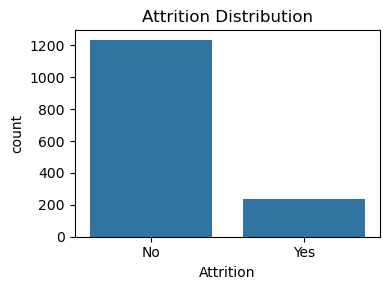

Categorical cardinalities (top 10):
JobRole           9
EducationField    6
MaritalStatus     3
Department        3
BusinessTravel    3
Attrition         2
Gender            2
OverTime          2
Over18            1
dtype: int64


In [8]:
# Quick visualization: target distribution
plt.figure(figsize=(4,3))
sns.countplot(x='Attrition', data=df_hr)
plt.title('Attrition Distribution')
plt.tight_layout()
plt.show()

# Save a small profile summary of categorical cardinalities
cat_card = df_hr[cat_cols_guess].nunique().sort_values(ascending=False)
print('Categorical cardinalities (top 10):')
print(cat_card.head(10))

In [11]:
# 1. Ensure our target variable is ready
# Recreate the Attrition_Flag column to ensure it exists in this cell's scope
print("Attrition categories:", df_hr['Attrition'].cat.categories)
# Map 'Yes' to 1 and 'No' to 0
df_hr['Attrition_Flag'] = (df_hr['Attrition'] == 'Yes').astype(int)
print("Attrition_Flag unique values:", df_hr['Attrition_Flag'].unique())

Attrition categories: Index(['No', 'Yes'], dtype='object')
Attrition_Flag unique values: [1 0]


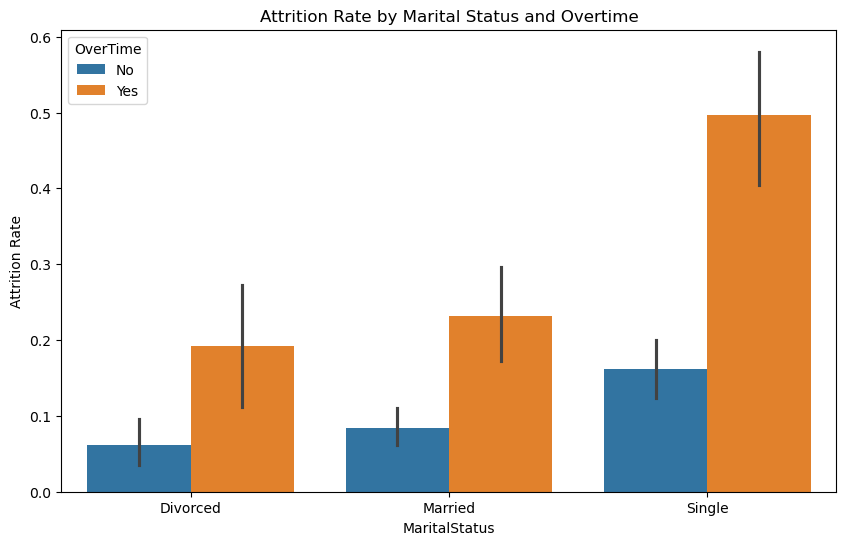

Attrition Rate by Department and Overtime:
OverTime                   No    Yes
Department                          
Human Resources         0.152  0.294
Research & Development  0.086  0.273
Sales                   0.138  0.375


In [12]:
# 2. Deepen Categorical Analysis: Intersection of Factors
plt.figure(figsize=(10, 6))
sns.barplot(data=df_hr, x='MaritalStatus', y='Attrition_Flag', hue='OverTime', estimator=np.mean)
plt.title('Attrition Rate by Marital Status and Overtime')
plt.ylabel('Attrition Rate')
plt.show()

# Create a pivot table for Department and Overtime (WARNING FIXED HERE)
pivot_1 = pd.pivot_table(df_hr, values='Attrition_Flag', index='Department', columns='OverTime', aggfunc='mean', observed=False)
print("Attrition Rate by Department and Overtime:")
print(pivot_1.round(3))

In [13]:
# 3. Analyze Job Role More Granularly (Volume vs. Rate)
leavers = df_hr[df_hr['Attrition'] == 'Yes']
role_leaver_count = leavers['JobRole'].value_counts()
role_total_count = df_hr['JobRole'].value_counts()

# Create a DataFrame for analysis
role_attrition_df = pd.DataFrame({
    'Total_Employees': role_total_count,
    'Total_Leavers': role_leaver_count,
    'Attrition_Rate': (role_leaver_count / role_total_count) * 100
}).fillna(0).sort_values('Total_Leavers', ascending=False)

print("\nAttrition Analysis by Job Role (Ordered by Volume of Leavers):")
print(role_attrition_df)


Attrition Analysis by Job Role (Ordered by Volume of Leavers):
                           Total_Employees  Total_Leavers  Attrition_Rate
JobRole                                                                  
Laboratory Technician                  259             62       23.938224
Sales Executive                        326             57       17.484663
Research Scientist                     292             47       16.095890
Sales Representative                    83             33       39.759036
Human Resources                         52             12       23.076923
Manufacturing Director                 145             10        6.896552
Healthcare Representative              131              9        6.870229
Manager                                102              5        4.901961
Research Director                       80              2        2.500000


In [14]:
# 4. Deepen Numeric Analysis: Compare Key Metrics (WARNING FIXED HERE)
key_numeric_features = ['MonthlyIncome', 'Age', 'YearsAtCompany', 'YearsSinceLastPromotion', 'TotalWorkingYears']

print("\nMean Values by Attrition Status:")
# Added observed=False to the groupby operation
print(df_hr.groupby('Attrition', observed=False)[key_numeric_features].mean().round(1))


Mean Values by Attrition Status:
           MonthlyIncome   Age  YearsAtCompany  YearsSinceLastPromotion  \
Attrition                                                                 
No                6832.7  37.6             7.4                      2.2   
Yes               4787.1  33.6             5.1                      1.9   

           TotalWorkingYears  
Attrition                     
No                      11.9  
Yes                      8.2  


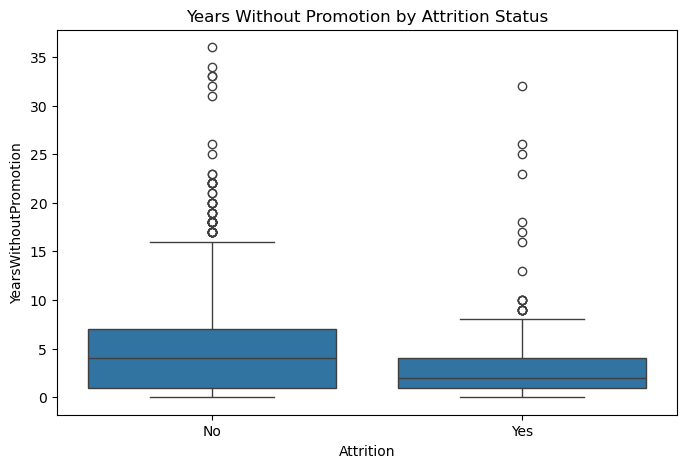


Correlation of 'YearsWithoutPromotion' with Attrition: -0.148


In [15]:
# 5. Analyze the "Promotion Gap"
# Create a new feature
df_hr['YearsWithoutPromotion'] = df_hr['YearsAtCompany'] - df_hr['YearsSinceLastPromotion']

# Now plot this new feature against Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_hr, x='Attrition', y='YearsWithoutPromotion')
plt.title('Years Without Promotion by Attrition Status')
plt.show()

# Check the correlation of this new feature with Attrition_Flag
corr_value = df_hr['YearsWithoutPromotion'].corr(df_hr['Attrition_Flag'])
print(f"\nCorrelation of 'YearsWithoutPromotion' with Attrition: {corr_value:.3f}")

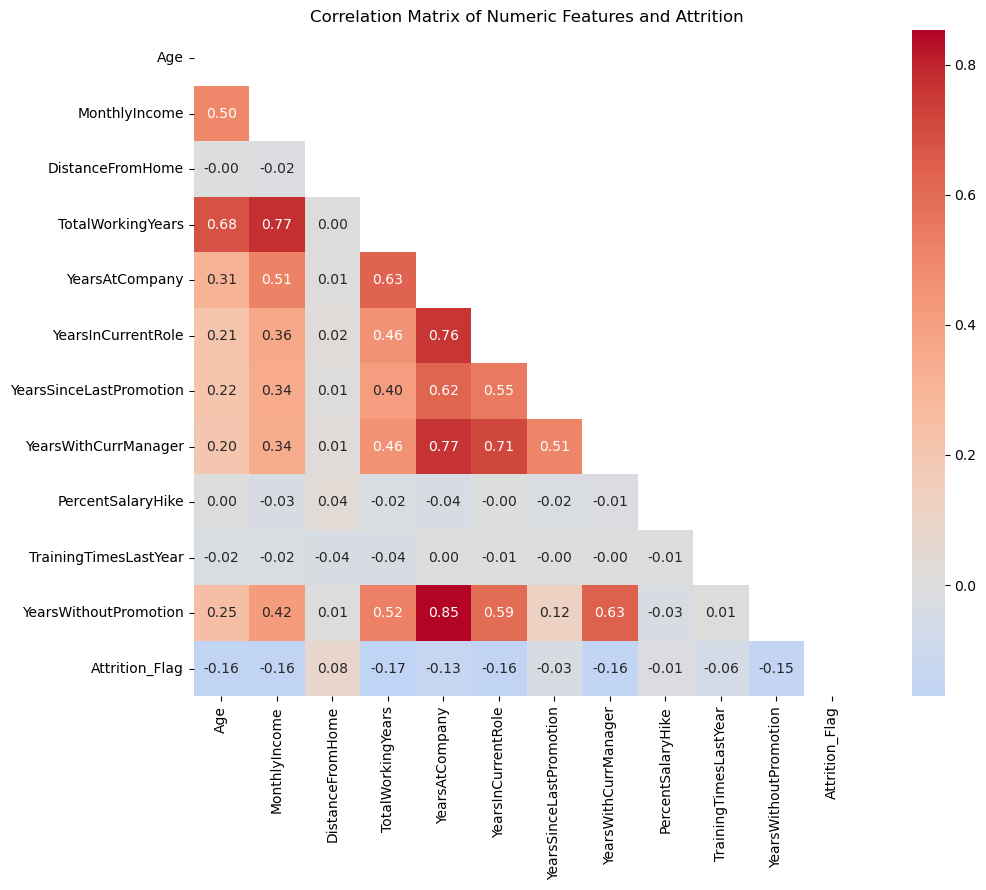

Top features correlated with Attrition:
Attrition_Flag           1.000000
TotalWorkingYears        0.171063
YearsInCurrentRole       0.160545
MonthlyIncome            0.159840
Age                      0.159205
YearsWithCurrManager     0.156199
YearsWithoutPromotion    0.147895
YearsAtCompany           0.134392
DistanceFromHome         0.077924
TrainingTimesLastYear    0.059478
Name: Attrition_Flag, dtype: float64


In [16]:
# 6. Correlation Analysis (The "Big Picture")
corr_features = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears', 
                 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                 'YearsWithCurrManager', 'PercentSalaryHike', 'TrainingTimesLastYear',
                 'YearsWithoutPromotion', 'Attrition_Flag']

plt.figure(figsize=(12, 9))
corr_matrix = df_hr[corr_features].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Numeric Features and Attrition')
plt.tight_layout()
plt.show()

# Print the top features most correlated with Attrition
print("Top features correlated with Attrition:")
print(corr_matrix['Attrition_Flag'].abs().sort_values(ascending=False).head(10))